In [1]:
## Get and clean data
dat_train<-read.csv("~/data/R/pml-training.csv")
dat_test<-read.csv("~/data/R/pml-testing.csv")

In [2]:
dim(dat_train)

[1] 19622   160

In [3]:
## Fraction of NA number in data
sum(is.na(dat_train))/(ncol(dat_train)*nrow(dat_train))

[1] 0.4100856

In [71]:
#remove the NA columns in train sets
dat_train_NA<-apply(dat_train, 2, function(x) {sum(is.na(x))})
dat_train_clean <- dat_train[,which(dat_train_NA == 0)]

In [72]:
dim(dat_train_clean)

[1] 19622    93

In [73]:
dat_train_clean<-dat_train_clean[,8:ncol(dat_train_clean)]

In [74]:
dim(dat_train_clean)

[1] 19622    86

In [90]:
#str(dat_train_clean)

In [91]:
dat1<-dat_train_clean[, !sapply(dat_train_clean, is.factor)]
#str(dat1)

In [81]:
dat1$classe<-dat_train_clean$classe

In [83]:
library(caret)
inTrain <- createDataPartition(y = dat1$classe, p = 0.8, list = FALSE)
training <- dat1[inTrain, ]
crossval <- dat1[-inTrain, ]

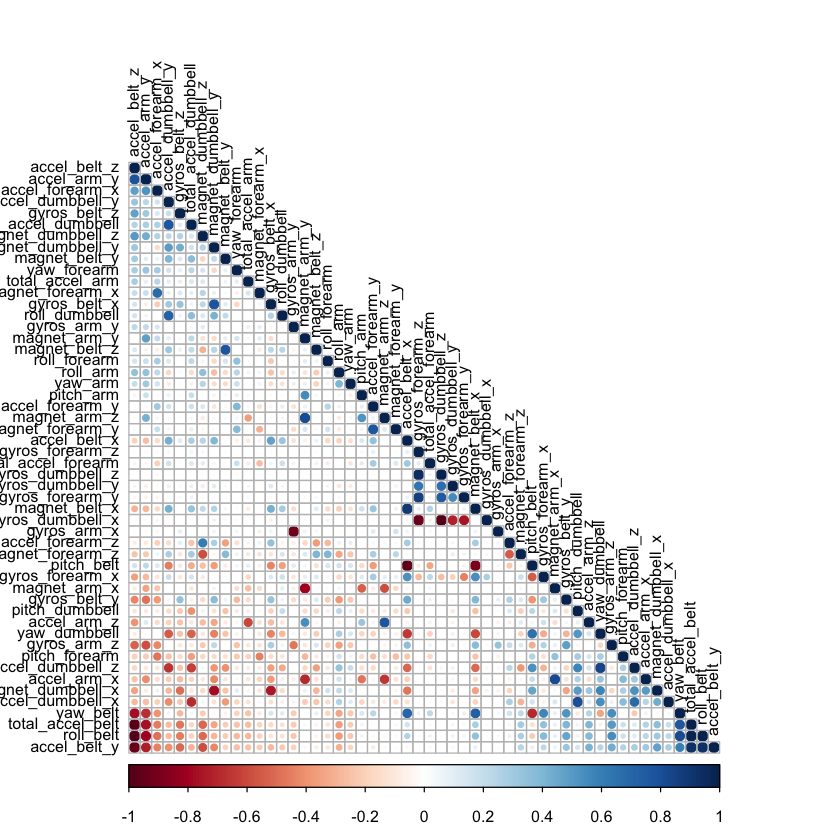

In [93]:
library(corrplot)
correlMatrix <- cor(training[, -length(training)])
corrplot(correlMatrix, order = "FPC", method = "circle", 
         type = "lower", tl.cex = 0.8,  tl.col = rgb(0, 0, 0))

In [85]:
library(randomForest)
fit <- randomForest(classe ~ ., data = training)

In [86]:
summary(fit)

                Length Class  Mode     
call                3  -none- call     
type                1  -none- character
predicted       15699  factor numeric  
err.rate         3000  -none- numeric  
confusion          30  -none- numeric  
votes           78495  matrix numeric  
oob.times       15699  -none- numeric  
classes             5  -none- character
importance         52  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               15699  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [87]:
predictCrossVal <- predict(fit, crossval)
confusionMatrix(crossval$classe, predictCrossVal)

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1116    0    0    0    0
         B    4  754    1    0    0
         C    0    4  678    2    0
         D    0    0    3  640    0
         E    0    0    0    1  720

Overall Statistics
                                          
               Accuracy : 0.9962          
                 95% CI : (0.9937, 0.9979)
    No Information Rate : 0.2855          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9952          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9964   0.9947   0.9941   0.9953   1.0000
Specificity            1.0000   0.9984   0.9981   0.9991   0.9997
Pos Pred Value         1.0000   0.9934   0.9912   0.9953   0.9986
Neg Pred Value         0.9986   0.9987   0.9988   0.9991   1.0000
Prevalence    

In [100]:
library(ggplot2)
#qplot(crossval$classe,predictCrossVal)

In [94]:
dat_test_NA <- apply(dat_test, 2, function(x) {sum(is.na(x))})
dat_test_clean <- dat_test[,which(dat_test_NA == 0)]
dat_test_clean <- dat_test_clean[8:ncol(dat_test_clean)]

In [96]:
dat2<-dat_test_clean[, !sapply(dat_test_clean, is.factor)]

In [98]:
predict(fit, dat2)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 B  A  B  A  A  E  D  B  A  A  B  C  B  A  E  E  A  B  B  B 
Levels: A B C D E

In [104]:
### clean data
Url<-"https://d396qusza40orc.cloudfront.net/getdata%2Fprojectfiles%2FUCI%20HAR%20Dataset.zip"
destfile <- "~/data/R/clean-data.zip"

In [105]:
download.file(Url, destfile)

In [116]:
setwd("~/data/R")
unzip("~/data/R/clean-data.zip")

In [118]:
testX <- read.table("~/data/R/UCI HAR Dataset/test/X_test.txt")
testY <- read.table("~/data/R/UCI HAR Dataset/test/Y_test.txt")
testSub <- read.table("~/data/R/UCI HAR Dataset/test/subject_test.txt")

In [120]:
trainX   <- read.table("~/data/R/UCI HAR Dataset/train/X_train.txt")
trainY   <- read.table("~/data/R/UCI HAR Dataset/train/Y_train.txt")
trainSub <- read.table("~/data/R/UCI HAR Dataset/train/subject_train.txt")

In [124]:
dim(trainX)
dim(trainY)
dim(trainSub)

[1] 7352  561

[1] 7352    1

[1] 7352    1

In [125]:
dim(testX)
dim(testY)
dim(testSub)

[1] 2947  561

[1] 2947    1

[1] 2947    1

In [132]:
labels <- read.table("~/data/R/UCI HAR Dataset/activity_labels.txt")
features <- read.table("~/data/R/UCI HAR Dataset/features.txt")

In [127]:
dim(labels)

[1] 6 2

In [128]:
dim(features)

[1] 561   2

In [133]:
features <- gsub("\\()", "", features$V2)
head(features)

[1] tBodyAcc-mean()-X tBodyAcc-mean()-Y tBodyAcc-mean()-Z tBodyAcc-std()-X 
[5] tBodyAcc-std()-Y  tBodyAcc-std()-Z 
477 Levels: angle(tBodyAccJerkMean),gravityMean) ... tGravityAccMag-std()

[1] "tBodyAcc-mean-X" "tBodyAcc-mean-Y" "tBodyAcc-mean-Z" "tBodyAcc-std-X" 
[5] "tBodyAcc-std-Y"  "tBodyAcc-std-Z"

In [136]:
labels <- labels$V2
labels <- tolower(labels)
labels <- sub("_", " ", labels)

In [137]:
labels

[1] "walking"            "walking upstairs"   "walking downstairs"
[4] "sitting"            "standing"           "laying"

In [148]:
names(testX) <- features; names(trainX) <- features
names(testY) <- "activity"; names(trainY) <- "activity"
names(testSub) <- "subject"; names(trainSub) <- "subject"

In [140]:
dat <- rbind(testX, trainX)

In [141]:
dim(dat)

[1] 10299   561

In [157]:
selected <- grep("mean|std", names(dat))
length(selected)

[1] 79

In [182]:
test_res <- data.frame(testY, testSub)
training_res <- data.frame(trainY, trainSub)
all_dat <- rbind(test_res, training_res)
dim(all_dat)

[1] 10299     2

In [183]:
for (i in selected){  
    all_dat <- cbind(all_dat, dat[i])
}

In [184]:
library(plyr)
all_dat$activity<-mapvalues(all_dat$activity,from=levels(factor(all_dat$activity)),to = labels)

[1] "standing" "standing" "standing" "standing" "standing" "standing"

[1] "walking upstairs" "walking upstairs" "walking upstairs" "walking upstairs"
[5] "walking upstairs" "walking upstairs"

In [188]:
all_dat$activity<-as.factor(all_dat$activity)
summary(all_dat$activity)

laying            sitting           standing            walking 
              1944               1777               1906               1722 
walking downstairs   walking upstairs 
              1406               1544

In [190]:
all_dat$subject<-as.factor(all_dat$subject)
summary(all_dat$subject)

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
347 302 341 317 302 325 308 281 288 294 316 320 327 323 328 366 368 364 360 354 
 21  22  23  24  25  26  27  28  29  30 
408 321 372 381 409 392 376 382 344 383

In [214]:
data1<-all_dat[,3:ncol(all_dat)]
dat_tidy <- aggregate(data1, by=list(all_dat$activity,all_dat$subject), FUN=mean)
names(dat_tidy)[1] <- "activity"; names(dat_tidy)[2] <- "subject"
write.table(file = "final_data.txt", x = dat_tidy, row.names = FALSE)
head(dat_tidy,n=10)
dim(dat_tidy)

,activity,subject,tBodyAcc-mean-X,tBodyAcc-mean-Y,tBodyAcc-mean-Z,tBodyAcc-std-X,tBodyAcc-std-Y,tBodyAcc-std-Z,tGravityAcc-mean-X,tGravityAcc-mean-Y,ellip.h,fBodyAccMag-meanFreq,fBodyBodyAccJerkMag-mean,fBodyBodyAccJerkMag-std,fBodyBodyAccJerkMag-meanFreq,fBodyBodyGyroMag-mean,fBodyBodyGyroMag-std,fBodyBodyGyroMag-meanFreq,fBodyBodyGyroJerkMag-mean,fBodyBodyGyroJerkMag-std,fBodyBodyGyroJerkMag-meanFreq
1,laying,1,0.2215982,-0.04051395,-0.1132036,-0.9280565,-0.8368274,-0.8260614,-0.2488818,0.7055498,⋯,0.08640856,-0.9333004,-0.921804,0.2663912,-0.8621902,-0.8243194,-0.139775,-0.9423669,-0.9326607,0.1764859
2,sitting,1,0.2612376,-0.001308288,-0.1045442,-0.977229,-0.9226186,-0.9395863,0.8315099,0.2044116,⋯,0.236655,-0.9852621,-0.9816062,0.3518522,-0.9584356,-0.9321984,-0.0002621867,-0.9897975,-0.9870496,0.1847759
3,standing,1,0.2789176,-0.01613759,-0.1106018,-0.9957599,-0.9731901,-0.9797759,0.942952,-0.2729838,⋯,0.2845553,-0.9925425,-0.992536,0.4222201,-0.9846176,-0.9784661,-0.02860577,-0.9948154,-0.9946711,0.3344987
4,walking,1,0.2773308,-0.01738382,-0.1111481,-0.2837403,0.1144613,-0.2600279,0.9352232,-0.282165,⋯,0.1906437,-0.0571194,-0.1034924,0.09382218,-0.1992526,-0.321018,0.2688444,-0.3193086,-0.3816019,0.1906634
5,walking downstairs,1,0.2891883,-0.009918505,-0.1075662,0.03003534,-0.03193594,-0.2304342,0.9318744,-0.2666103,⋯,0.1191871,0.02621849,-0.1040523,0.07649155,-0.1857203,-0.3983504,0.3496139,-0.2819634,-0.3919199,0.1900007
6,walking upstairs,1,0.2554617,-0.02395315,-0.097302,-0.354708,-0.002320265,-0.01947924,0.8933511,-0.3621534,⋯,-0.09774335,-0.4426522,-0.5330599,0.08535241,-0.3259615,-0.1829855,-0.2193034,-0.6346651,-0.6939305,0.1142773
7,laying,2,0.2813734,-0.01815874,-0.1072456,-0.9740595,-0.9802774,-0.9842333,-0.5097542,0.7525366,⋯,0.2662982,-0.9853741,-0.9845685,0.3417586,-0.972113,-0.9610984,0.01856447,-0.9902487,-0.9894927,0.2648015
8,sitting,2,0.2770874,-0.01568799,-0.1092183,-0.9868223,-0.9507045,-0.9598282,0.9404773,-0.10563,⋯,0.1309342,-0.9838747,-0.9841242,0.2800624,-0.9718406,-0.9613857,-0.1063589,-0.989862,-0.9896329,0.1947221
9,standing,2,0.2779115,-0.01842083,-0.1059085,-0.9872719,-0.957305,-0.9497419,0.8969286,-0.3700627,⋯,0.11965,-0.9770653,-0.9751605,0.3048719,-0.9617759,-0.9567887,-0.0661266,-0.9778498,-0.9777543,0.1606628
10,walking,2,0.2764266,-0.01859492,-0.1055004,-0.4236428,-0.07809125,-0.4252575,0.9130173,-0.3466071,⋯,0.3932062,-0.1690644,-0.164092,0.2075009,-0.5307048,-0.6517928,0.3052838,-0.5832493,-0.5581046,0.1263446


[1] 180  81

In [215]:
#### statistical inferences
set.seed(1234)
lam<-0.2
nosim<-10000
n<-40

In [217]:
sample<-matrix(rexp(n*nosim, lam), nosim)

In [219]:
dim(sample)

[1] 10000    40

In [235]:
rmean<-apply(sample,1,mean)
mean(rmean)
sim_mean<-mean(rmean)

[1] 5.005646

In [236]:
sd(rmean)
sim_sd<-sd(rmean)

[1] 0.7941202

In [227]:
t_mean<-1/lam
t_mean

[1] 5

In [229]:
t_sd<-1/lam/sqrt(n)
t_sd

[1] 0.7905694

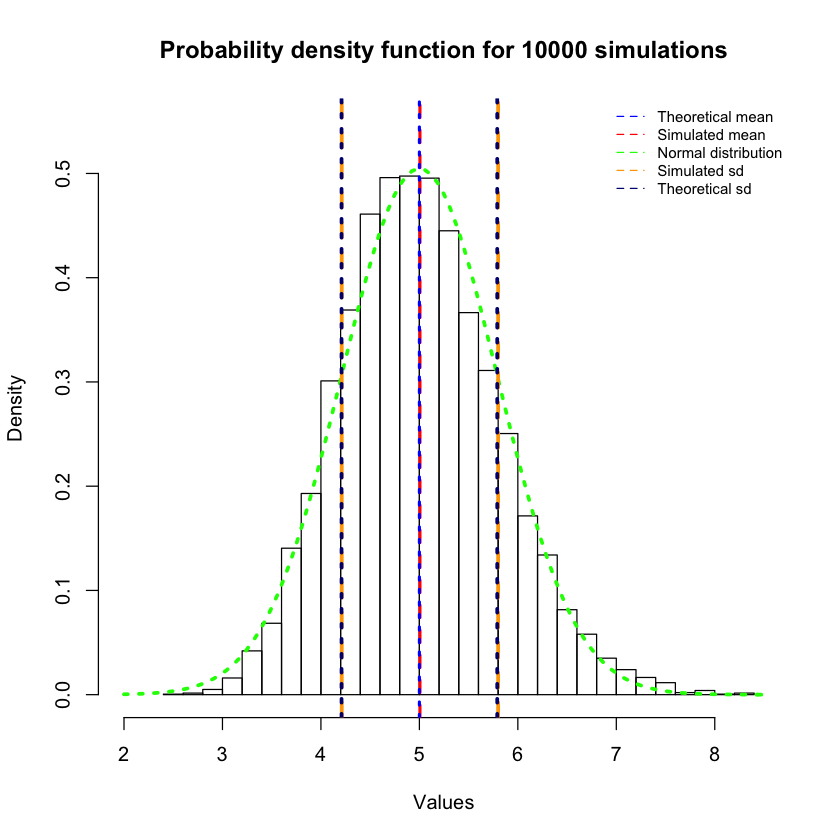

In [256]:
myhist <- hist(rmean, freq = FALSE, xlim = c(2, 8.5), ylim = c(0, .55), 
               breaks=30, main=paste("Probability density function for",nosim,"simulations"), 
               xlab = "Values")

abline(v = sim_mean, col = "red", lwd = 2.5, lty = 2)
abline(v = 5, col = "blue", lwd = 2.5, lty = 9)
x <- seq(min(rmean), max(rmean), length = 100) 
curve(dnorm(x, mean = t_mean, sd =t_sd), col = "green", lwd = 3, lty = 3, add = TRUE)

abline(v = sim_mean+sim_sd, lwd=3, lty = 2, col="orange")
abline(v = sim_mean-sim_sd, lwd=3, lty = 2, col="orange")
abline(v = t_mean+t_sd, lwd=3, lty = 9, col="navy")
abline(v = t_mean-t_sd, lwd=3, lty = 9, col="navy")

legend('topright', c("Theoretical mean", "Simulated mean", "Normal distribution", "Simulated sd",
                    "Theoretical sd"), 
       lty=2, col=c('blue', 'red', "green","orange","navy"), bty='n', cex=.75)

In [263]:
data(ToothGrowth)
?ToothGrowth

ToothGrowth              package:datasets              R Documentation

_T_h_e _E_f_f_e_c_t _o_f _V_i_t_a_m_i_n _C _o_n _T_o_o_t_h _G_r_o_w_t_h _i_n _G_u_i_n_e_a _P_i_g_s

_D_e_s_c_r_i_p_t_i_o_n:

     The response is the length of odontoblasts (cells responsible for
     tooth growth) in 60 guinea pigs.  Each animal received one of
     three dose levels of vitamin C (0.5, 1, and 2 mg/day) by one of
     two delivery methods, (orange juice or ascorbic acid (a form of
     vitamin C and coded as ‘VC’).

_U_s_a_g_e:

     ToothGrowth
     
_F_o_r_m_a_t:

     A data frame with 60 observations on 3 variables.

       [,1]  len   numeric  Tooth length                
       [,2]  supp  factor   Supplement type (VC or OJ). 
       [,3]  dose  numeric  Dose in milligrams/day      
      
_S_o_u_r_c_e:

     C. I. Bliss (1952) _The Statistics of Bioassay_.  Academic Press.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Interactive Data Analysis_.  New York:
     Wiley.

     Crampton, E. W. (1947) The growth of the odontoblast of the
     incisor teeth as a criterion of vitamin C intake of the guinea
     pig. _The Journal of Nutrition_ *33(5)*: 491-504.  <URL:
     http://jn.nutrition.org/content/33/5/491.full.pdf>

_E_x_a_m_p_l_e_s:

     require(graphics)
     coplot(len ~ dose | supp, data = ToothGrowth, panel = panel.smooth,
            xlab = "ToothGrowth data: length vs dose, given type of supplement")

In [262]:
summary(ToothGrowth)
dim(ToothGrowth)

      len        supp         dose      
 Min.   : 4.20   OJ:30   Min.   :0.500  
 1st Qu.:13.07   VC:30   1st Qu.:0.500  
 Median :19.25           Median :1.000  
 Mean   :18.81           Mean   :1.167  
 3rd Qu.:25.27           3rd Qu.:2.000  
 Max.   :33.90           Max.   :2.000  

[1] 60  3

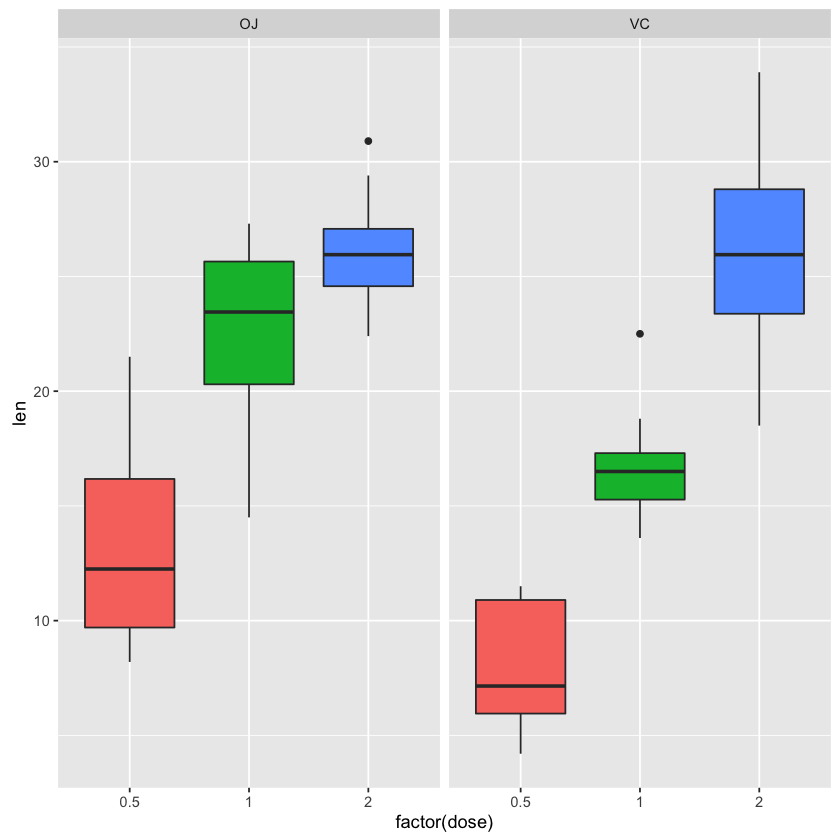

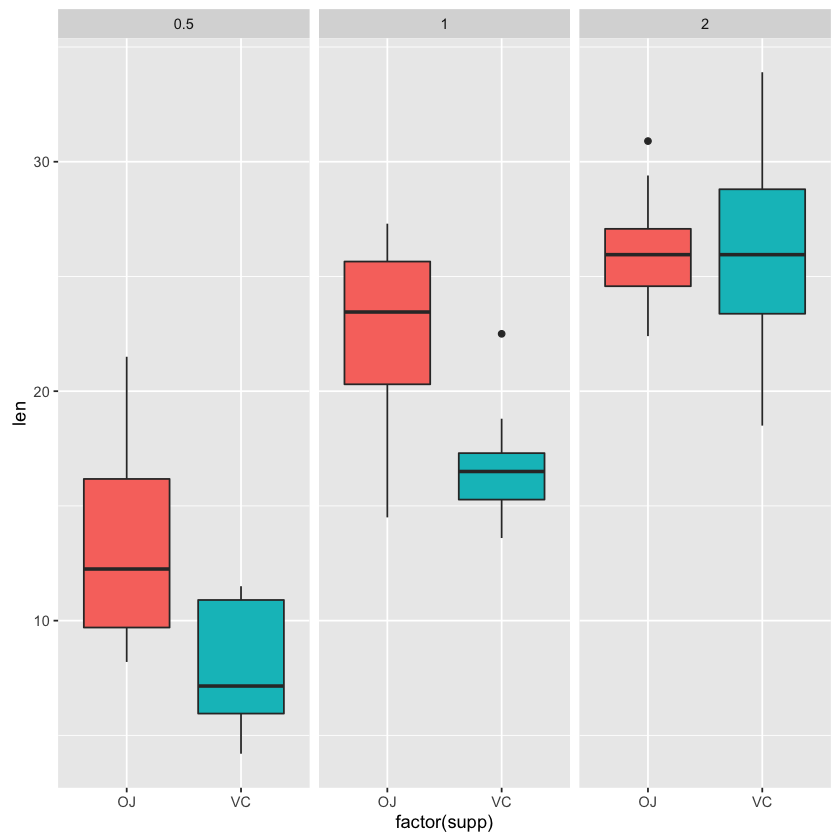

In [261]:
par(mfrow = c(1,2))
p1 <- ggplot(ToothGrowth, aes(x = factor(dose), y = len, fill = factor(dose))) 
p1 + geom_boxplot() + guides(fill=FALSE) + facet_grid(. ~ supp)
p2 <- ggplot(ToothGrowth, aes(x = factor(supp), y = len, fill = factor(supp))) 
p2 + geom_boxplot() + guides(fill=FALSE) + facet_grid(. ~ dose)

In [266]:
df0.5 <- subset(ToothGrowth, dose == 0.5)
df1.0 <- subset(ToothGrowth, dose == 1.0)
df2.0 <- subset(ToothGrowth, dose == 2.0)

In [267]:
test0.5 <- t.test(len ~ supp, paired = FALSE, var.equal = FALSE, data = df0.5)
test0.5$p.value 
test0.5$conf

[1] 0.006358607

[1] 1.719057 8.780943
attr(,"conf.level")
[1] 0.95

In [268]:
test1.0 <- t.test(len ~ supp, paired = FALSE, var.equal = FALSE, data = df1.0)
test1.0$p.value 
test1.0$conf

[1] 0.001038376

[1] 2.802148 9.057852
attr(,"conf.level")
[1] 0.95

In [269]:
test2.0 <- t.test(len ~ supp, paired = FALSE, var.equal = FALSE, data = df2.0)
test2.0$p.value 
test2.0$conf

[1] 0.9638516

[1] -3.79807  3.63807
attr(,"conf.level")
[1] 0.95